## CS345 Fall 2024 Assignment 3


### Datasets

* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
  

## Part 1:  choosing optimal hyperparameters

Just about any machine learning algorithm has some **hyperparameters**.  These are parameters that are set by the user and are not determined as part of the training process.
The perceptron for example, has two of those - the number of epochs and the learning rate.  For the k-nearest neighbor classifier (kNN) it's the number of neighbors, $k$, and for the linear SVM it's the soft margin constant, $C$.  Our objective in machine learning is to obtain classifiers with high accuracy, and have good estimates of how well they are performing.  In other words, we need to know how accurate a classifier would be on unseen data.  This is why we use separate test sets that the classifier has not seen for evaluating accuracy.

When working with classifiers with hyperparameters you may be tempted to apply the following procedure:

* Randomly split the data into separate train and test sets.
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the training set and evaluate its accuracy on the test set.
* Choose the parameter value that maximizes the accuracy over the test set, and report the accuracy that you obtained.

However, it turns out that this procedure is flawed, and the resulting accuracy estimate can be overly optimistic.  This is because the choice of the best performing parameter value used information about the test set: by selecting the best value according to accuracy on the test set, we use information about the labels of the test set.  Therefore, the predicted labels are based on information regarding the labels of the test set, making it so this is no longer an independent test set.

Here is a better approach.  Rather than splitting the data into train and test sets, we will now split the data into three sets:  **training, validation, and test**.  The validation set will be used for evaluation of different values of the hyperparameter, leading to the following approach:

* Randomly split the data into separate train, validation, and test sets (say with ratios of 0.5, 0.2, 0.3).
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the **training set** and evaluate its accuracy on the **validation set**. 
* Choose the best classifier, and report its accuracy over the **test set**.

Your task is as follows:

* Use the method described above to evaluate the accuracy of the kNN classifier over the QSAR and Wisconsin breast cancer dataset.  When iterating over the hyperparameter value $k$, use a wide range of values.  Repeat the process ten times for different data splits and report the average accuracy over the test set and the value of $k$ that was chosen most often for each dataset.  The result should be in the form of a table that shows average accuracy and most common hyperparameter value for each dataset.  We recommend using pandas to display nicely formatted tables as suggested in assignment 2.  Note that the optimal value of $k$ may vary for different splits.  Comment on your results.

* Perform the same experiment for the linear SVM. In this case the soft-margin constant $C$ is the hyperparameter that requires an informed choice.  Use a wide range of values for $C$, as we have done in class.  Comment on your results.

In your code, use the scikit-learn kNN and SVM implementations; you can also use the scikit-learn `train_test_split`.  When using scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class, make sure to provide the parameter `kernel="linear"` so that the the resulting SVM is indeed linear; alternatively, use the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) class.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load Datasets
def load_qsar():
    filename='data/biodeg.csv'
    biodeg_data = pd.read_csv(filename, delimiter=';', dtype=object, skipinitialspace=True, header=None).values
    biodeg_data[biodeg_data[:, -1] == "RB", -1] = 1
    biodeg_data[biodeg_data[:, -1] == "NRB", -1] = -1
    X = biodeg_data[:,:-1].astype(np.float64) 
    y = biodeg_data[:,-1].astype(np.float64)
    return X, y

def breast_cancer_loader():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    y[y == 0] = -1
    return X, y

def createDataSet(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,  test_size=0.4, stratify=y_temp, random_state=42)
    return X_test, y_test, X_val, y_val, X_train, y_train 

In [7]:
# Load X, y for Qsar/breast cancer
QX, Qy = load_qsar()
BX, By = breast_cancer_loader()

# Dataset splits
QX_test, Qy_test, QX_val, Qy_val, QX_train, Qy_train = createDataSet(QX, Qy)
BX_test, By_test, BX_val, By_val, BX_train, By_train = createDataSet(QX, Qy)

# Train kNN
def knn_accuracy_list(X_train, y_train, X_test, y_test):
    k_values =[1, 2, 4, 8, 16, 32, 64, 128]
    kNN_averages = []
    for n in k_values:
        kvalue_accuracies = []
        for  i in range(10):
            knn = KNeighborsClassifier(n_neighbors=n)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            kvalue_accuracies.append(accuracy)
        kvalue_avg = np.average(kvalue_accuracies)
        kNN_averages.append(kvalue_avg)
    return kNN_averages

QSAR_KNN = knn_accuracy_list(QX_train, Qy_train, QX_val, Qy_val)
BC_KNN = knn_accuracy_list(BX_train, By_train, BX_val, By_val)

In [8]:
def SVM_accuracy_list(X_train, y_train, X_test, y_test):
    C_values = [1.0, 0.1, 0.01, 0.001, 0.0001]
    SVM_averages = []
    for n in C_values:
        Cvalue_accuracies = []
        for  i in range(10):
            SVM = SVC(kernel = 'linear', C=n)
            SVM.fit(X_train, y_train)
            y_pred = SVM.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            Cvalue_accuracies.append(accuracy)
        Cvalue_avg = np.average(Cvalue_accuracies)
        SVM_averages.append(Cvalue_avg)
    return SVM_averages

QSAR_SVM = SVM_accuracy_list(QX_train, Qy_train, QX_val, Qy_val)
BC_SVM = SVM_accuracy_list(BX_train, By_train, BX_val, By_val)

In [9]:
data = [
['kNN (QSAR)', QSAR_KNN[0], QSAR_KNN[1], QSAR_KNN[2], QSAR_KNN[3], QSAR_KNN[4], QSAR_KNN[5], QSAR_KNN[6], QSAR_KNN[7]],
['SVM (QSAR)', QSAR_SVM[0], QSAR_SVM[1], QSAR_SVM[2], QSAR_SVM[3], QSAR_SVM[4]],
['kNN (CANCER)',BC_KNN[0], BC_KNN[1], BC_KNN[2], BC_KNN[3], BC_KNN[4], BC_KNN[5], BC_KNN[6], BC_KNN[7]],
['SVM (CANCER)',BC_SVM[0], BC_SVM[1], BC_SVM[2], BC_SVM[3], BC_SVM[4]]
]
pd.DataFrame(data, columns = ['Classifier', 'index0', 'index1', 'index2', 'index3', 'index4', 'index5', 'index6', 'index7'])

,Classifier,index0,index1,index2,index3,index4,index5,index6,index7
0,kNN (QSAR),0.781646,0.819620,0.800633,0.778481,0.746835,0.727848,0.718354,0.677215
1,SVM (QSAR),0.886076,0.870253,0.835443,0.784810,0.661392,NaN,NaN,NaN
2,kNN (CANCER),0.781646,0.819620,0.800633,0.778481,0.746835,0.727848,0.718354,0.677215
3,SVM (CANCER),0.886076,0.870253,0.835443,0.784810,0.661392,NaN,NaN,NaN


There is noteworthy differences in the accuracy values produced from the variations of hyperparameters. You can see above that for the SVM the most effective tended to be 1 - 0.01 for both datasets, and for the k value it seemed that somewhere between 2-8 was the most effective, at least for the size of the validation set.

## Part 2:  PCA for removing noise from data

As we have seen in class, the accuracy of the nearest neighbor classifer degrades when the data has noisy features that are not relevant to the classification problem.  To remedy this problem, we will use PCA to reduce the dimensionality of the data.

Here is what you need to do:

* **Classifier accuracy with and without noise**.  Use the QSAR dataset and evaluate the accuracy of the K nearest neighbors and SVM classifiers.  For simplicity, choose the values of K and $C$ that you selected in part 1.  In your experiments, standardize the dataset.  Next, add 1,000 noise features and evaluate model accuracy after doing so (use the better performing dataset between standardized / non-standardized dataset as your starting point).

* **Note:** here is a code snippet for generating noise with a Gaussian distribution:
```Python
# generate a matrix of "noise" features of size N x d
# each component of the matrix will have a normal (Gaussian) distribution
# with mean of 0 and standard deviation equal to 0.5
rng = np.random.default_rng(seed)
X_noise = rng.normal(0, 0.5, size=(N, d))
```

* **Can PCA improve accuracy on noisy data?**  Next, we will see if PCA can improve the accuracy of the classifier on the data we added noise to.  Use PCA to represent the noise-added data in the space of the principal components.  Make sure the data is centered or standardized before applying PCA.  (Recall that centering refers to subtracting the mean from each feature, making it so that each feature has a mean of 0).  Note that the noise features do not need to be standardized!  Evaluate the accuracy of the KNN and SVM classifiers as you vary the number of principal components (no need to go above the original dimensionality of the dataset when doing so).  Plot the accuracy of each classifier on the test set as you vary the number of components.
* **Discussion**.  Discuss your results:  was PCA useful for improving classifier accuracy?  Which of the two classifiers appears to be more robust to noise?  Why do you think that is the case?


In [10]:
from sklearn.preprocessing import StandardScaler

# To normalize data
scaler = StandardScaler()
QX_train_normalized = scaler.fit_transform(QX_train)
QX_test_normalized = scaler.transform(QX_test)

print(QX_train_normalized.shape, Qy_train.shape)
print(QX_test_normalized.shape, Qy_train.shape)

QSAR_KNN = knn_accuracy_list(QX_train_normalized, Qy_train, QX_test_normalized, Qy_test)
QSAR_SVM = SVM_accuracy_list(QX_train_normalized, Qy_train, QX_test_normalized, Qy_test)

(527, 41) (527,)
(212, 41) (527,)


In [11]:
data = [
['kNN (QSAR)', QSAR_KNN[0], QSAR_KNN[1], QSAR_KNN[2], QSAR_KNN[3], QSAR_KNN[4], QSAR_KNN[5], QSAR_KNN[6], QSAR_KNN[7]],
['SVM (QSAR)', QSAR_SVM[0], QSAR_SVM[1], QSAR_SVM[2], QSAR_SVM[3], QSAR_SVM[4]],
['kNN (CANCER)',BC_KNN[0], BC_KNN[1], BC_KNN[2], BC_KNN[3], BC_KNN[4], BC_KNN[5], BC_KNN[6], BC_KNN[7]],
['SVM (CANCER)',BC_SVM[0], BC_SVM[1], BC_SVM[2], BC_SVM[3], BC_SVM[4]]
]
pd.DataFrame(data, columns = ['Classifier', 'index0', 'index1', 'index2', 'index3', 'index4', 'index5', 'index6', 'index7'])

,Classifier,index0,index1,index2,index3,index4,index5,index6,index7
0,kNN (QSAR),0.853774,0.834906,0.872642,0.858491,0.820755,0.816038,0.754717,0.764151
1,SVM (QSAR),0.858491,0.853774,0.839623,0.712264,0.665094,NaN,NaN,NaN
2,kNN (CANCER),0.781646,0.819620,0.800633,0.778481,0.746835,0.727848,0.718354,0.677215
3,SVM (CANCER),0.886076,0.870253,0.835443,0.784810,0.661392,NaN,NaN,NaN


In [12]:
# add noise
rng = np.random.default_rng(seed=42)
X_noise = rng.normal(0, 0.5, size=(QX_train.shape[0], 1000))

X_noise_train = rng.normal(0, 0.5, size=(QX_train.shape[0], 1000))
X_noise_test = rng.normal(0, 0.5, size=(QX_test.shape[0], 1000))

QX_train_normalized_noisy = np.hstack((QX_train_normalized, X_noise_train))
QX_test_normalized_noisy = np.hstack((QX_test_normalized, X_noise_test))

print(QX_train_normalized_noisy.shape)
print(Qy_train.shape)
print(QX_test_normalized_noisy.shape)
print(Qy_test.shape)

QSAR_KNN = knn_accuracy_list(QX_train_normalized_noisy, Qy_train, QX_test_normalized_noisy, Qy_test)
QSAR_SVM = SVM_accuracy_list(QX_train_normalized_noisy, Qy_train, QX_test_normalized_noisy, Qy_test)

data = [
['kNN (QSAR)', QSAR_KNN[0], QSAR_KNN[1], QSAR_KNN[2], QSAR_KNN[3], QSAR_KNN[4], QSAR_KNN[5], QSAR_KNN[6], QSAR_KNN[7]],
['SVM (QSAR)', QSAR_SVM[0], QSAR_SVM[1], QSAR_SVM[2], QSAR_SVM[3], QSAR_SVM[4]],
['kNN (CANCER)',BC_KNN[0], BC_KNN[1], BC_KNN[2], BC_KNN[3], BC_KNN[4], BC_KNN[5], BC_KNN[6], BC_KNN[7]],
['SVM (CANCER)',BC_SVM[0], BC_SVM[1], BC_SVM[2], BC_SVM[3], BC_SVM[4]]
]
pd.DataFrame(data, columns = ['Classifier', 'index0', 'index1', 'index2', 'index3', 'index4', 'index5', 'index6', 'index7'])

(527, 1041)
(527,)
(212, 1041)
(212,)


,Classifier,index0,index1,index2,index3,index4,index5,index6,index7
0,kNN (QSAR),0.674528,0.707547,0.712264,0.707547,0.778302,0.773585,0.750000,0.745283
1,SVM (QSAR),0.716981,0.716981,0.716981,0.740566,0.665094,NaN,NaN,NaN
2,kNN (CANCER),0.781646,0.819620,0.800633,0.778481,0.746835,0.727848,0.718354,0.677215
3,SVM (CANCER),0.886076,0.870253,0.835443,0.784810,0.661392,NaN,NaN,NaN


In [13]:
rng = np.random.default_rng(seed=42)
X_noise = rng.normal(0, 0.5, size=(QX_train.shape[0], 1000))

X_noise_train = rng.normal(0, 0.5, size=(QX_train.shape[0], 1000))
X_noise_test = rng.normal(0, 0.5, size=(QX_test.shape[0], 1000))

QX_train_noisy = np.hstack((QX_train, X_noise_train))
QX_test_noisy = np.hstack((QX_test, X_noise_test))

QSAR_KNN = knn_accuracy_list(QX_train_noisy, Qy_train, QX_test_noisy, Qy_test)
QSAR_SVM = SVM_accuracy_list(QX_train_noisy, Qy_train, QX_test_noisy, Qy_test)

data = [
['kNN (QSAR)', QSAR_KNN[0], QSAR_KNN[1], QSAR_KNN[2], QSAR_KNN[3], QSAR_KNN[4], QSAR_KNN[5], QSAR_KNN[6], QSAR_KNN[7]],
['SVM (QSAR)', QSAR_SVM[0], QSAR_SVM[1], QSAR_SVM[2], QSAR_SVM[3], QSAR_SVM[4]],
['kNN (CANCER)',BC_KNN[0], BC_KNN[1], BC_KNN[2], BC_KNN[3], BC_KNN[4], BC_KNN[5], BC_KNN[6], BC_KNN[7]],
['SVM (CANCER)',BC_SVM[0], BC_SVM[1], BC_SVM[2], BC_SVM[3], BC_SVM[4]]
]
pd.DataFrame(data, columns = ['Classifier', 'index0', 'index1', 'index2', 'index3', 'index4', 'index5', 'index6', 'index7'])

,Classifier,index0,index1,index2,index3,index4,index5,index6,index7
0,kNN (QSAR),0.731132,0.754717,0.759434,0.754717,0.716981,0.688679,0.702830,0.679245
1,SVM (QSAR),0.712264,0.712264,0.740566,0.806604,0.665094,NaN,NaN,NaN
2,kNN (CANCER),0.781646,0.819620,0.800633,0.778481,0.746835,0.727848,0.718354,0.677215
3,SVM (CANCER),0.886076,0.870253,0.835443,0.784810,0.661392,NaN,NaN,NaN


In [24]:
knn_accuracies = []
svm_accuracies = []

components_range = range(1, 100)

for n_components in components_range:
    try:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(QX_train_noisy)
        X_test_pca = pca.transform(QX_test_noisy)

        # kNN
        knn = KNeighborsClassifier()
        knn.fit(X_train_pca, Qy_train)
        knn_pred = knn.predict(X_test_pca)
        knn_accuracy = accuracy_score(Qy_test, knn_pred)
        knn_accuracies.append(knn_accuracy)

        # SVM
        svm = SVC()
        svm.fit(X_train_pca, Qy_train)
        svm_pred = svm.predict(X_test_pca)
        svm_accuracy = accuracy_score(Qy_test, svm_pred)
        svm_accuracies.append(svm_accuracy)
    
    except Exception as e:
        print(f"Error with {n_components} components: {e}")

Error with 1 components: name 'PCA' is not defined
Error with 2 components: name 'PCA' is not defined
Error with 3 components: name 'PCA' is not defined
Error with 4 components: name 'PCA' is not defined
Error with 5 components: name 'PCA' is not defined
Error with 6 components: name 'PCA' is not defined
Error with 7 components: name 'PCA' is not defined
Error with 8 components: name 'PCA' is not defined
Error with 9 components: name 'PCA' is not defined
Error with 10 components: name 'PCA' is not defined
Error with 11 components: name 'PCA' is not defined
Error with 12 components: name 'PCA' is not defined
Error with 13 components: name 'PCA' is not defined
Error with 14 components: name 'PCA' is not defined
Error with 15 components: name 'PCA' is not defined
Error with 16 components: name 'PCA' is not defined
Error with 17 components: name 'PCA' is not defined
Error with 18 components: name 'PCA' is not defined
Error with 19 components: name 'PCA' is not defined
Error with 20 compone

ValueError: x and y must have same first dimension, but have shapes (99,) and (0,)

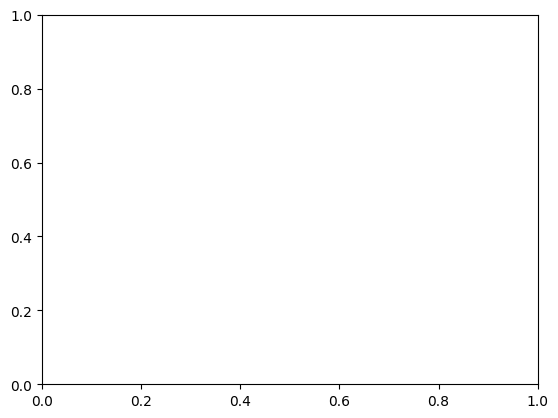

In [20]:
import matplotlib.pyplot as plt
plt.plot(components_range, knn_accuracies, label='kNN', color='blue')
plt.plot(components_range, svm_accuracies, label='SVM', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.legend()
plt.show()

**Discussion of your results**

The addition of noise features clearly degraded the accuracy of the kNN and SVM, and through the PCA the reduction of noise leads to more accurate values being produced by the SVM and kNN.

### Code organization

Both tasks in this assignment require you to run a particular experiment over multiple classifiers, datasets, or pre-processing steps.  In writing your code refrain from repeating the code over and over again.  To achieve that, decompose the task such that your code is modular and concise.  Not only will your code be more readable and elegant, this will also enable you to be more productive.

### Part 3:  Use of AI and other web resources

In the cell below indicate in detail how you used AI and other web resources for this assignment.  If you used AI tools, indicate how useful they were.

I used many of the SKLEARN pages, as well as google search to give me examples of how certain functionalities work and learning how each parameter to a function affects it.

### Your Report

Answer the questions in the cells reserved for that purpose.

### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

```
Grading sheet for assignment 3

Part 1:  50 points
Model selection code for SVM/KNN (40 pts)
Discussion of your results (5 pts)
Code organization (5 pts)

Part 2:  50 points
Baseline SVM/KNN accuracy (10 pt)
SVM/KNN accuracy as a function of number of PCs (25 pts)
Discussion of your results (10 pt)
Code organization (5 pts)

Make sure you address your use of AI and web resources
```

Grading should be based on the following criteria:

  * Code correctness.
  * Code organization.  You code is well organized without unnecessary duplication.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.
  
